# Boston Housing Project:- SciKit
I am going to use SciKit learn to predict housing prices. This project uses linear regression concept of machine learning. This is my fourth project using online resources/courses on data science & machine learning. Please email me on kay.pandya@gmail.com with questions or suggestions on improving my methods for this project or any other project.

I am going to start this project by getting basic library imports.

In [6]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [8]:
#loading boston data for project.
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

In [10]:
#Printing our boston dataset
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

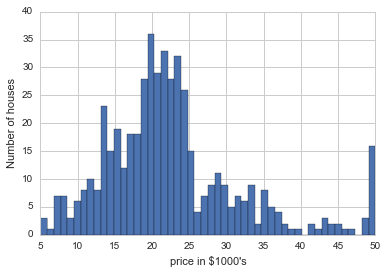

In [11]:
#I try to plot as soon as possible to get idea about the project.
#It also gives me unusual objects or data involved in the project.
plt.hist(boston.target,bins=50)
plt.xlabel("price in $1000's")
plt.ylabel("Number of houses")

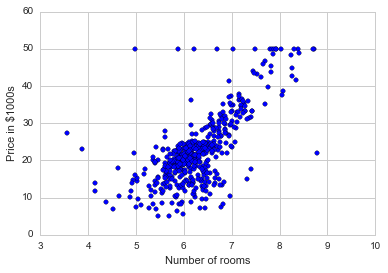

In [12]:
# scatter plot rooms vs price
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [13]:
#Creating boston dataframe to start manipulating the data and progress towards predicting.
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
#Let's add price column
boston_df["Price"]=boston.target

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


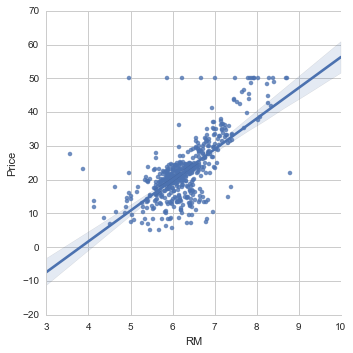

In [16]:
#linear plot for RM vs price
sns.lmplot("RM","Price",data=boston_df)

Numpy has a built in Least Square Method in it's library. I will use that for single variable linear regression than I will move to SciKit for multi-variable linear regression.


In [17]:
# X as median room values
X = boston_df.RM

# Using v to make X two dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.

Y = boston_df.Price

In [18]:
X = np.array( [ [value,1] for value in X ] )

In [19]:
m, b = np.linalg.lstsq(X, Y)[0]

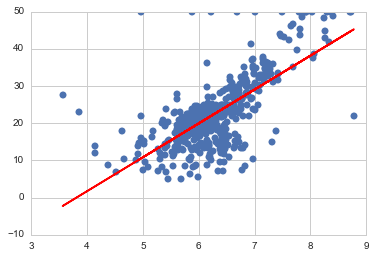

In [20]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [21]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print "The root mean squared error was %.2f " %rmse

The root mean squared error was 6.60 


In [22]:
import sklearn
from sklearn.linear_model import LinearRegression

In [23]:
lreg = LinearRegression()

In [24]:
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

In [25]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print ' The estimated intercept coefficient is %.2f ' %lreg.intercept_

 The estimated intercept coefficient is 36.49 


In [27]:
print ' The number of coefficients used was %d ' % len(lreg.coef_)

 The number of coefficients used was 13 


In [28]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [29]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [30]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [31]:
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [33]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)
    
print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 48.06
Fit a model X_train, and calculate MSE with X_test and Y_test: 30.33


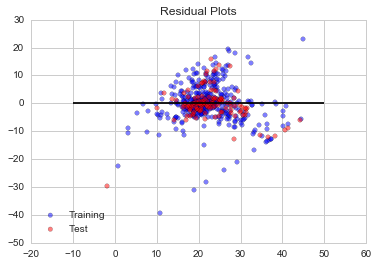

In [34]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')